<a href="https://colab.research.google.com/github/Nataliahfk/TELECOM-X---PARTE-2/blob/main/TelecomX_SegundaParte_Natalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELECOM X - PARTE 2: Previsión de cancelación en las suscripciones**

##**Descripción del proyecto:**

Desarrollo de modelos predictivos capaces de preveer que clientes tienen mayor probabilidad de cancelar sus suscripciones.

##**Objetivos:**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#📊 **Preparar los datos para el modelado**

##Importando y conociendo los datos

In [742]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [743]:
#Importando datos
datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


In [744]:
datos.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales', 'cuentas_diarias'],
      dtype='object')

# 🛠️ Tratamiento de los Datos

In [745]:
datos = datos.rename(columns={
    'es_ciudadano_senior': 'adulto_mayor',
    'meses_en_empresa': 'meses_empresa',
    'phone.PhoneService': 'servicio_telefonico',
    'lineas_multiples': 'multiples_lineas',
    'tipo_internet': 'servicio_internet',
    'tv_streaming': 'streaming_tv',
    'peliculas_streaming': 'streaming_peliculas',
    'cargos_mensuales': 'cargo_mensual',
    'cargos_totales': 'cargo_total'
})

print(datos.columns)


Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'meses_empresa', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'cargo_mensual', 'cargo_total',
       'cuentas_diarias'],
      dtype='object')


✔️ Remover columnas irrelevantes

***Nota**: inicialmente, se eliminarán las varialbes id_cliente ya que esta no aporta poder predictivo debido a que es un simple identificador de cliente, y cuentas_diarias ya que esta variable fue agregada simplemente al dividir cargos_mensuales en 30 días, lo cual resulta redundante y no aporta ningun valor agregado al análisis.*

In [746]:
# Eliminación de Columnas Irrelevantes
datos.drop('id_cliente', axis=1, inplace=True)
datos.drop('cuentas_diarias', axis=1, inplace=True)
datos

,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_empresa,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65


In [747]:
datos.shape[0]

7256

In [748]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   adulto_mayor            7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_empresa           7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   multiples_lineas        7256 non-null   object 
 8   servicio_internet       7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  streaming_tv            7256 non-null   object 
 14  streaming_peliculas     7256 non-null   

In [749]:
print("\nEstadísticas Variables cualitativas:")
datos.describe(include='object')


Estadísticas Variables cualitativas:


,genero,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,metodo_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,month to month,electronic check
freq,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


In [750]:
columnas_categoricas = datos.select_dtypes(include='object').columns
print(columnas_categoricas)

Index(['genero', 'multiples_lineas', 'servicio_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'streaming_tv', 'streaming_peliculas', 'tipo_contrato', 'metodo_pago'],
      dtype='object')


#Distribución de la variable de respuesta (Abandono)

In [751]:
porcentaje_abandono = datos['abandono'].value_counts(normalize=True)*100
porcentaje_abandono.round(2)

,proportion
abandono,
0,74.24
1,25.76


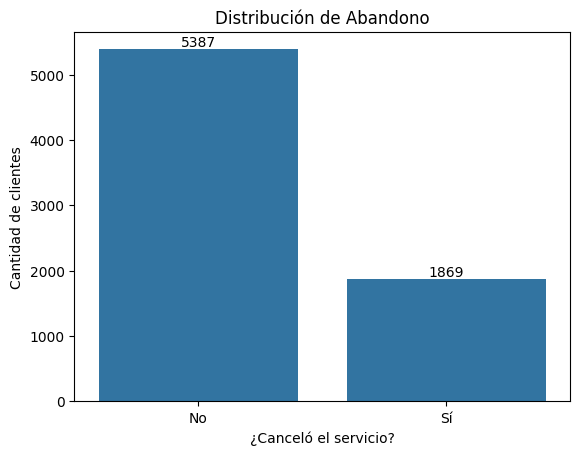

In [752]:
ax = sns.countplot(data=datos, x='abandono')

# Títulos y etiquetas
plt.title('Distribución de Abandono')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])

# Agregar etiquetas de valores
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

#Visualización de las variables categóricas sobre Cancelaciones de los usuarios.

In [753]:
px.histogram(datos,x='genero',text_auto=True,color='abandono',barmode='group')

In [754]:
px.histogram(datos,x='tiene_pareja',text_auto=True,color='abandono',barmode='group')

In [755]:
px.histogram(datos,x='tiene_dependientes',text_auto=True,color='abandono',barmode='group')

In [756]:
datos['adulto_mayor'].value_counts(normalize=True).round(2)*100

,proportion
adulto_mayor,
0,84.0
1,16.0


In [757]:
px.histogram(datos,x='adulto_mayor',text_auto=True,color='abandono',barmode='group')

In [758]:
px.histogram(datos,x='servicio_internet',text_auto=True,color='abandono',barmode='group')

In [759]:
px.histogram(datos,x='tipo_contrato',text_auto=True,color='abandono',barmode='group')

In [760]:
px.histogram(datos,x='metodo_pago',text_auto=True,color='abandono',barmode='group')

**OBSERVACIONES**



---



+ Variables altamente correlacionadas con abandono:

tipo_contrato:
Los clientes con contrato "month to month" tienen una tasa de abandono notablemente mayor.

metodo_pago:
"Electronic check" tiene mayor abandono que pagos automáticos.

---

+ Variables con poca influencia visual:

genero:
 No hay diferencia significativa entre hombres y mujeres.

adulto mayor:
 Ligera diferencia, pero no muy marcada.

tiene_dependientes y tiene_pareja:
Patrones no evidentes.


#Visualización de las variables cuantitativas sobre Abandono de los usuarios.

In [761]:
print("\nEstadísticas Variables cuantitativas:")
datos.describe()


Estadísticas Variables cuantitativas:


,abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_empresa,servicio_telefonico,factura_electronica,cargo_mensual,cargo_total
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


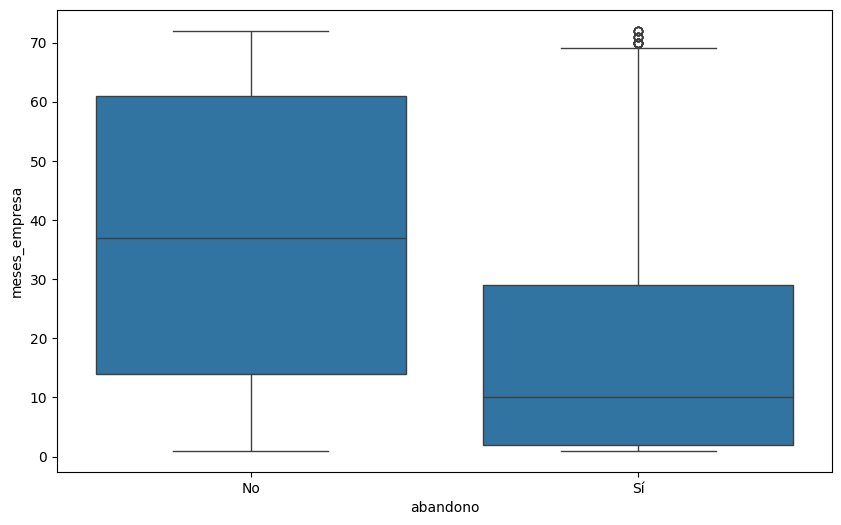

In [762]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='abandono', y='meses_empresa', data=datos)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

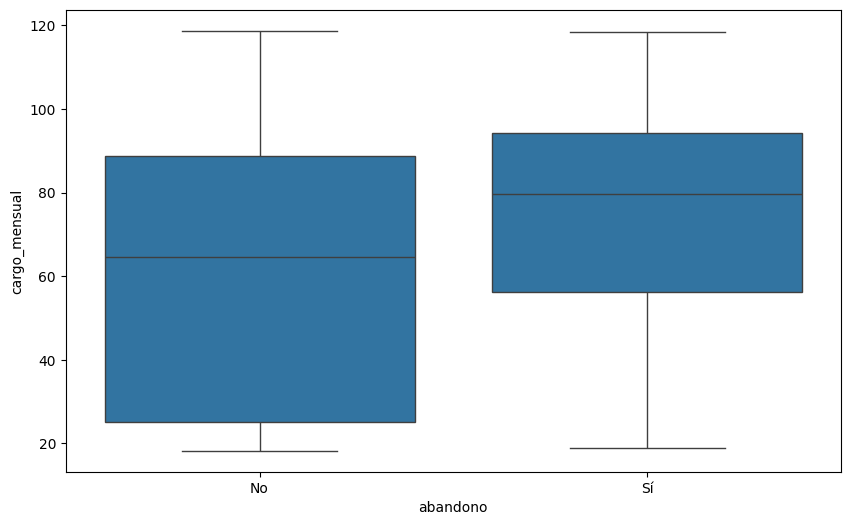

In [763]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='abandono', y='cargo_mensual', data=datos)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

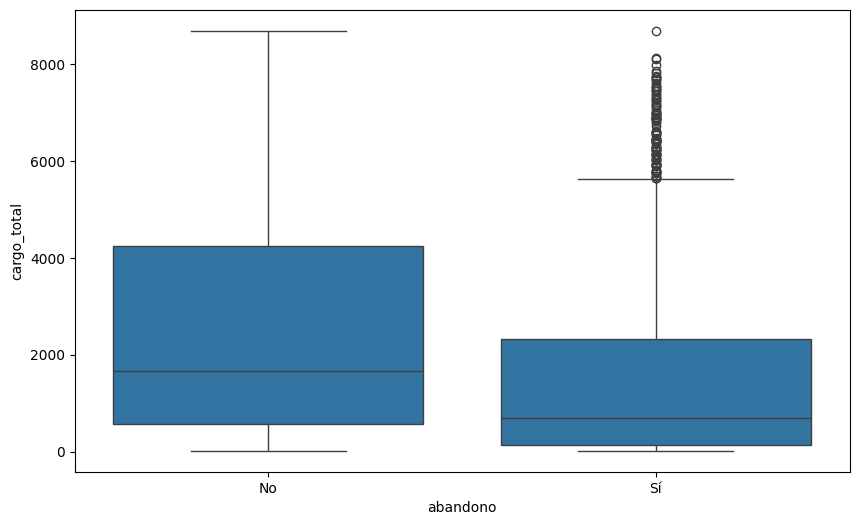

In [764]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='abandono', y='cargo_total', data=datos)
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

##Análisis de correlación:

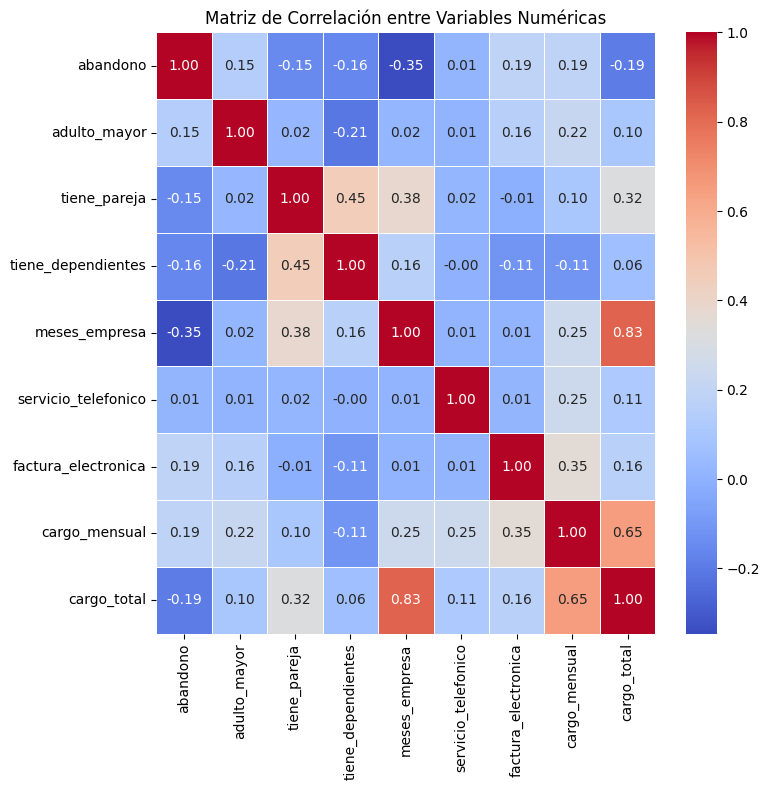

In [765]:
numericas = datos.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlacion = numericas.corr()

# Graficamos el heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

#Tranformación de los datos

✔️ Agrupación de No y No service

✅ Resumen: Por qué agrupamos "No" y "No internet service"

🎯 Objetivo

Reducir multicolinealidad y simplificar los datos sin perder relevancia para el modelo predictivo.

---------------------------------------------------------------
⚠️ El problema original

   - Variables como OnlineSecurity, StreamingTV, etc., tenían tres categorías:

     - "Yes" → cliente usa el servicio
     - "No" → cliente tiene internet, pero no contrató el servicio
     - "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:
   - Creaba correlación 1.0 entre variables
   - Generaba VIF infinito
   - Comprometía la estabilidad y el rendimiento de los modelos

-----------------------------------------------------------------
✅ La solución: agrupar "No internet service" como "No"

  - Agrupamos "No internet service" como "No" para simplificar la variable:

   - "Yes" = significa que usa el servicio
   - "No" = significa que no usa el servicio
   
Esto reduce la dimensionalidad y evita multicolinealidad.

La información de que el cliente no tiene internet sigue estando en la variable InternetService.

In [766]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   adulto_mayor            7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_empresa           7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   multiples_lineas        7256 non-null   object 
 8   servicio_internet       7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  streaming_tv            7256 non-null   object 
 14  streaming_peliculas     7256 non-null   

In [767]:
# para crear uno nuevo
datos_clean = datos.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = ['seguridad_online','respaldo_online', 'proteccion_dispositivo',
               'soporte_tecnico','streaming_tv', 'streaming_peliculas']

for col in cols_to_fix:
    datos_clean[col] = datos_clean[col].replace('No internet service', 'No')

datos = datos_clean

In [768]:
# Separar variables explicativas y la variable de respuesta
x = datos.drop('abandono', axis=1)
y = datos['abandono']

In [769]:
x

,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_empresa,servicio_telefonico,multiples_lineas,servicio_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65


In [770]:
y

,abandono
0,0
1,0
2,1
3,1
4,1
...,...
7251,0
7252,1
7253,0
7254,0


#2.2. Transformando variables explicativas

**OBSERVACIONES**

- Para este proceso se aplico codificación OneHotEncoding mediante el método pd.getdummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero.


In [771]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [772]:
columnas = x.columns

In [773]:
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), columnas_categoricas),
    remainder='passthrough',
    sparse_threshold=0
)

In [774]:
x = one_hot_encoder.fit_transform(x)

In [775]:
one_hot_encoder.get_feature_names_out(columnas)

array(['onehotencoder__genero_Male', 'onehotencoder__multiples_lineas_No',
       'onehotencoder__multiples_lineas_No phone service',
       'onehotencoder__multiples_lineas_Yes',
       'onehotencoder__servicio_internet_DSL',
       'onehotencoder__servicio_internet_Fiber optic',
       'onehotencoder__servicio_internet_No',
       'onehotencoder__seguridad_online_Yes',
       'onehotencoder__respaldo_online_Yes',
       'onehotencoder__proteccion_dispositivo_Yes',
       'onehotencoder__soporte_tecnico_Yes',
       'onehotencoder__streaming_tv_Yes',
       'onehotencoder__streaming_peliculas_Yes',
       'onehotencoder__tipo_contrato_month to month',
       'onehotencoder__tipo_contrato_one year',
       'onehotencoder__tipo_contrato_two year',
       'onehotencoder__metodo_pago_bank transfer automatic',
       'onehotencoder__metodo_pago_credit card automatic',
       'onehotencoder__metodo_pago_electronic check',
       'onehotencoder__metodo_pago_mailed check',
       'remainder__

In [776]:
pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(columnas))

,onehotencoder__genero_Male,onehotencoder__multiples_lineas_No,onehotencoder__multiples_lineas_No phone service,onehotencoder__multiples_lineas_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fiber optic,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_Yes,onehotencoder__proteccion_dispositivo_Yes,...,onehotencoder__metodo_pago_electronic check,onehotencoder__metodo_pago_mailed check,remainder__adulto_mayor,remainder__tiene_pareja,remainder__tiene_dependientes,remainder__meses_empresa,remainder__servicio_telefonico,remainder__factura_electronica,remainder__cargo_mensual,remainder__cargo_total
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90
7252,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70
7253,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75
7254,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65


##Transformando variable respuesta

In [777]:
from sklearn.preprocessing import LabelEncoder

In [778]:
label_encoder = LabelEncoder()

In [779]:
y = label_encoder.fit_transform(y)

In [780]:
y

array([0, 0, 1, ..., 0, 0, 0])

**Observacion:**
------------
X: contiene solo las features explicativas (sin la variable objetivo).

y: contiene la variable objetivo (abandono), que se estará usando para el entrenamiento y evaluación.

##🤖 Modelos Predictivos

**↔️ Separando los datos Train y Test**

In [781]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y, random_state=42)

- BALANCEO DE CLASES CON SMOTE

In [782]:
# Aplicar SMOTE para balancear la clase minoritaria en el set de entrenamiento
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

##Modelo de referencia - Baseline

In [783]:
from sklearn.dummy import DummyClassifier

In [784]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7424242424242424

##Modelo de árbol de decisión

In [785]:
from sklearn.tree import DecisionTreeClassifier

In [786]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(x_train, y_train)

modelo_arbol.score(x_test, y_test)

0.7913223140495868

- Normalizar

Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [787]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
x_train_normalizado = normalizacion.fit_transform(X_train_smote)
x_test_normalizado = normalizacion.transform(x_test)

In [788]:
pd.DataFrame(x_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,1.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.859155,0.0,1.0,0.252239,0.315013
1,0.000000,0.000000,0.0,1.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.225352,1.0,0.0,0.696517,0.166380
2,0.000000,1.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0,0.016418,0.000127
3,1.000000,0.000000,0.0,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126761,1.0,1.0,0.536318,0.089482
4,0.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.774648,1.0,0.0,0.702985,0.571105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.554687,0.445313,0.0,0.554687,0.0,1.0,0.0,0.000000,1.000000,0.000000,...,0.554687,0.445313,0.000000,0.000000,0.000000,0.311400,1.0,1.0,0.634861,0.212335
8614,0.000000,0.000000,0.0,1.000000,0.0,1.0,0.0,0.174068,0.825932,0.825932,...,1.000000,0.000000,0.000000,0.825932,0.825932,0.154930,1.0,1.0,0.649591,0.103845
8615,0.631459,0.368541,0.0,0.631459,0.0,1.0,0.0,0.000000,1.000000,0.368541,...,0.631459,0.000000,0.631459,0.368541,0.000000,0.323944,1.0,1.0,0.818720,0.279034
8616,0.784405,0.215595,0.0,0.784405,0.0,1.0,0.0,0.000000,0.215595,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.0,0.560131,0.006432


##Modelo KNN

In [789]:
from sklearn.neighbors import KNeighborsClassifier

In [790]:
knn = KNeighborsClassifier()
knn.fit(x_train_normalizado, y_train_smote)

knn.score(x_test_normalizado, y_test)

0.6914600550964187

In [791]:
lista = [('dummy', dummy, x_test), ('arbol',modelo_arbol,x_test), ('knn',knn,x_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]} es: {i[1].score(i[2], y_test)}')

La exactitud del modelo dummy es: 0.7424242424242424
La exactitud del modelo arbol es: 0.7913223140495868
La exactitud del modelo knn es: 0.6914600550964187


In [792]:
from sklearn.model_selection import train_test_split

In [793]:
x,x_test,y,y_test = train_test_split(x,y,test_size=0.2,stratify = y, random_state=42)
x_train,x_val,y_train, y_val = train_test_split(x,y,stratify = y, random_state=42)

In [794]:
modelo_arbol = DecisionTreeClassifier(max_depth=4)
modelo_arbol.fit(x_train, y_train)

print(f'La exactitud con el conjunto de entrenamiento es de: {modelo_arbol.score(x_train,y_train)}')
print(f'La exactitud con el conjunto de validación es de:  {modelo_arbol.score(x_val,y_val)}')

La exactitud con el conjunto de entrenamiento es de: 0.80289455547898
La exactitud con el conjunto de validación es de:  0.7705031013094418


##Modelo RamdomForetClassifier

In [795]:
from sklearn.ensemble import RandomForestClassifier

In [796]:
modelo_rf = RandomForestClassifier(max_depth = 10)
modelo_rf.fit(x_train, y_train)
print(f'Precisión de entrenamiento: {modelo_rf.score(x_train, y_train)}')
print(f'Precisión de validación: {modelo_rf.score(x_val, y_val)}')

Precisión de entrenamiento: 0.888812313347117
Precisión de validación: 0.78842177808408


##Matriz de Confusión

In [797]:
from sklearn.metrics import confusion_matrix

In [798]:
y_previsto_arbol = modelo_arbol.predict(x_val)
matriz_confusion_arbol = confusion_matrix(y_val, y_previsto_arbol)
print(matriz_confusion_arbol)

[[965 112]
 [221 153]]


In [805]:
y_previsto_rf = modelo_rf.predict(x_val)
matriz_confusion_rf = confusion_matrix(y_val, y_previsto_rf)
print(matriz_confusion_rf)

[[981  96]
 [211 163]]


In [806]:
from sklearn.metrics import ConfusionMatrixDisplay

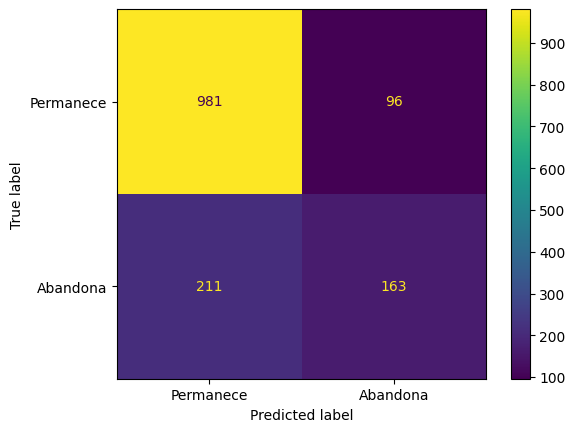

In [807]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rf, display_labels=['Permanece','Abandona'])
visualizacion.plot();

- El modelo predice 981 clientes que permanecen en la compañia.
- Como Falsos Negativos nos muestra 211 clientes.
- Como Falsos Positivos nos muestra 96 clientes.
- Y los que realmente Permaneces son 163 clientes.

#Evaluación de los Modelos

In [808]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [809]:
print(f'La Exactitud (Accuracy) del modelo de arbol es: {accuracy_score(y_val, y_previsto_arbol):.4f}')
print(f'La Precisión (Precision) del modelo de arbol es: {precision_score(y_val, y_previsto_arbol):.4f}')
print(f'La Sensibilidad (Recall) del modelo de arbol es: {recall_score(y_val, y_previsto_arbol):.4f}')
print(f'El F1-Score del modelo de arbol es: {f1_score(y_val, y_previsto_arbol):.4f}')

La Exactitud (Accuracy) del modelo de arbol es: 0.7705
La Precisión (Precision) del modelo de arbol es: 0.5774
La Sensibilidad (Recall) del modelo de arbol es: 0.4091
El F1-Score del modelo de arbol es: 0.4789


In [810]:
print(f'La Exactitud (Accuracy) del modelo RamdomForet es: {accuracy_score(y_val, y_previsto_rf):.4f}')
print(f'La Precisión (Precision) del modelo RamdomForet es: {precision_score(y_val, y_previsto_rf):.4f}')
print(f'La Sensibilidad (Recall) del modelo RamdomForet es: {recall_score(y_val, y_previsto_rf):.4f}')
print(f'El F1-Score del modelo RamdomForet es: {f1_score(y_val, y_previsto_rf):.4f}')

La Exactitud (Accuracy) del modelo RamdomForet es: 0.7884
La Precisión (Precision) del modelo RamdomForet es: 0.6293
La Sensibilidad (Recall) del modelo RamdomForet es: 0.4358
El F1-Score del modelo RamdomForet es: 0.5150


CURVA ROC

In [827]:
from sklearn.metrics import RocCurveDisplay

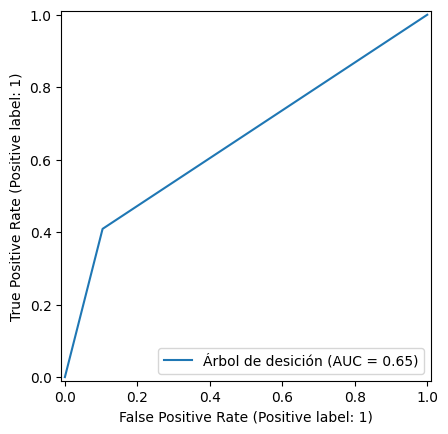

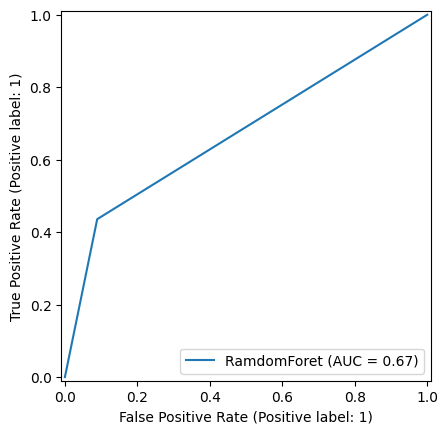

In [832]:
RocCurveDisplay.from_predictions(y_val, y_previsto_arbol, name='Árbol de desición');
RocCurveDisplay.from_predictions(y_val, y_previsto_rf, name='RamdomForet');

In [829]:
from sklearn.metrics import roc_auc_score

In [831]:
print(f'El AUC del modelo de árbol es: {roc_auc_score(y_val, y_previsto_arbol):.2f}')
print(f'El AUC del modelo de RamdomForet es: {roc_auc_score(y_val, y_previsto_rf):.2f}')

El AUC del modelo de árbol es: 0.65
El AUC del modelo de RamdomForet es: 0.67


In [ ]:
from sklearn.metrics import PrecisionRecallDisplay